<a href="https://colab.research.google.com/github/matteo-meat/signature-forgery-detection/blob/dev/signature_forgery_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
parent_path = "/content/drive/MyDrive/Colab projects/signature-forgery-detection/signatures"
classes = ["full_forg", "full_org"]

In [ ]:
def center_img(img):

  temp = img

  for row in range (0, temp.shape[0]):
    if 0 in th_img[row]:
      temp = temp[row:, :]
      break

  for row in range(temp.shape[0] -1, -1, -1):
    if 0 in temp[row]:
      temp = temp[:row, :]
      break

  temp = np.transpose(temp)

  for col in range (0, temp.shape[0]):
    if 0 in temp[col]:
      temp = temp[col:, :]
      break

  for row in range(temp.shape[0] -1, -1, -1):
    if 0 in temp[row]:
      temp = temp[:row, :]
      break

  return np.transpose(temp)


def pre_process(img):

  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # cv2_imshow(gray)

  # resized = cv2.resize(gray, (400, 300), interpolation = cv2.INTER_AREA)

  blurred = cv2.GaussianBlur(gray, (5, 5), 0)
  # cv2_imshow(blurred)

  _ ,th_img = cv2.threshold(blurred,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)
  # cv2_imshow(th_img)

  # centered = center_img(th_img)
  cv2_imshow(th_img)

  return th_img

In [ ]:
# contours, _ = cv2.findContours(th_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# # cv2_imshow(cv2.drawContours(th_img, contours, -1, (0,255,0), 3))

# M = cv2.moments(contours[0])

# cx = int(M['m10']/M['m00'])
# cy = int(M['m01']/M['m00'])


# dx = th_img.shape[0] - cx
# print(dx)
# # dy = th_img[0][0] - cy

# T = np.float32([
# 	[1, 0, -dx],
# 	[0, 1, 0]
# ])

# shifted = cv2.warpAffine(th_img, T, (th_img.shape[1], th_img.shape[0]))
# cv2_imshow(shifted)

# if dx >= 0:
#   centered = shifted[:, :th_img.shape[1]-dx]
#   cv2_imshow(centered)
# else:
#     centered = shifted[:, -dx:]
#     cv2_imshow(centered)
# print(centered.shape)


# cv2_imshow(resized)
# print(resized.shape)

Loading class full_forg
/content/drive/MyDrive/Colab projects/signature-forgery-detection/signatures/full_forg
/content/drive/MyDrive/Colab projects/signature-forgery-detection/signatures/full_forg/full_forg1


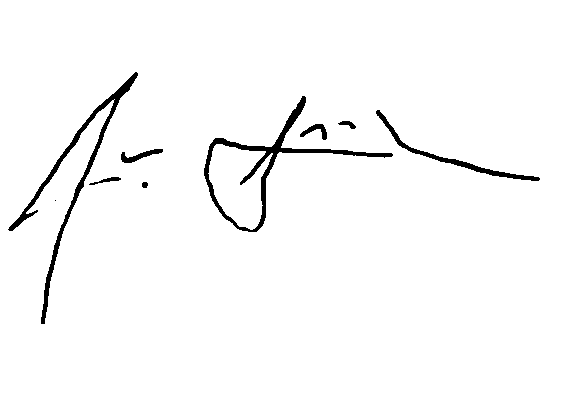

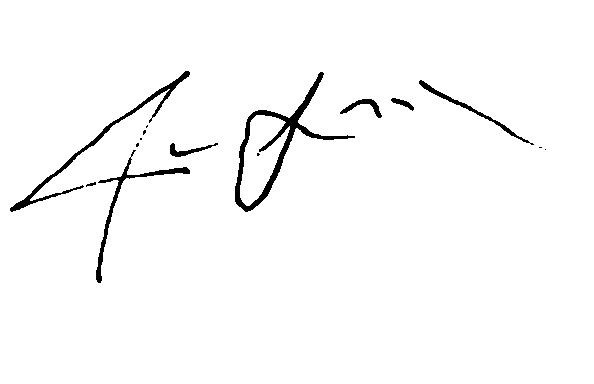

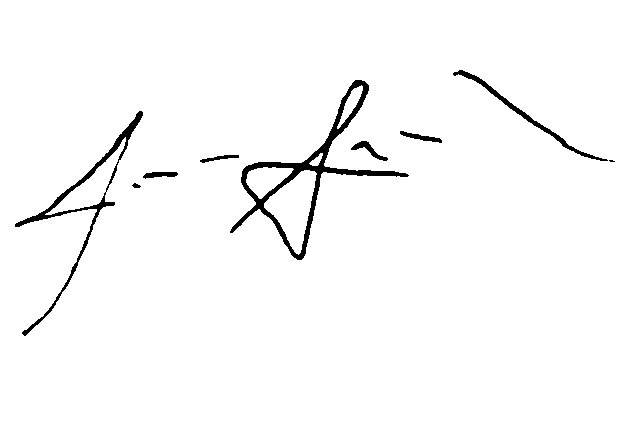

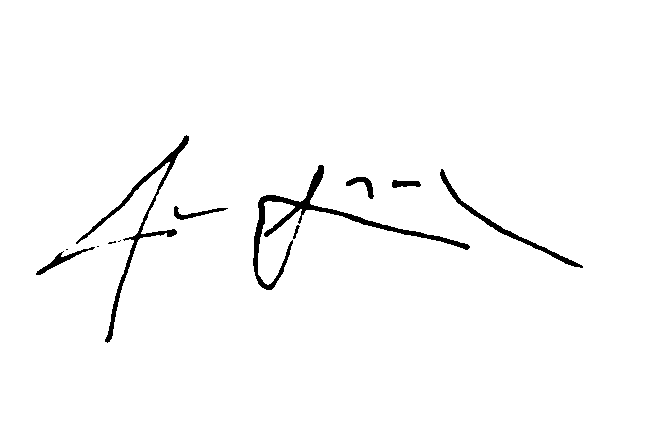

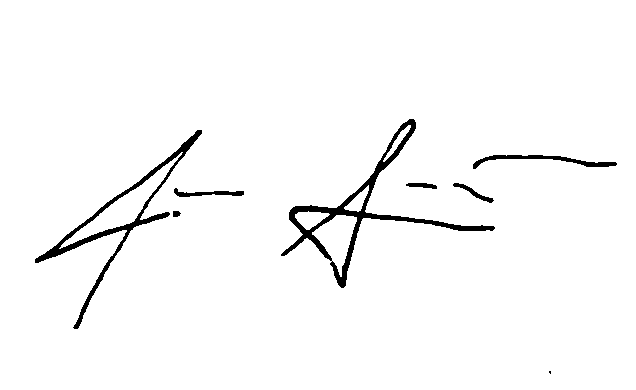

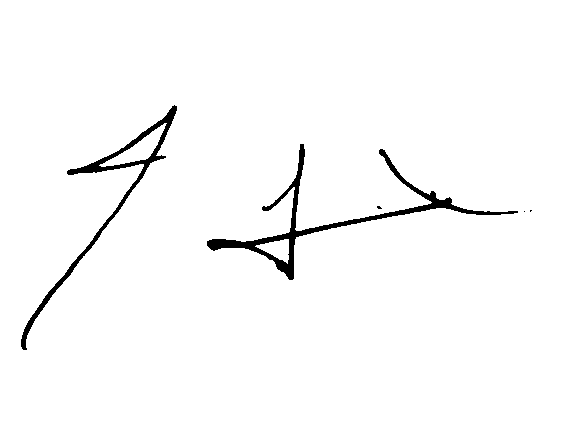

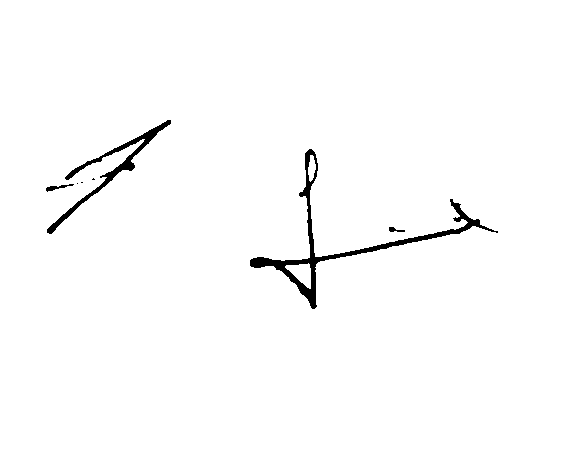

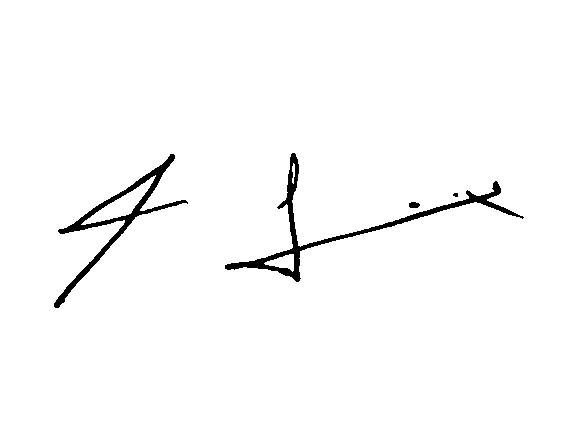

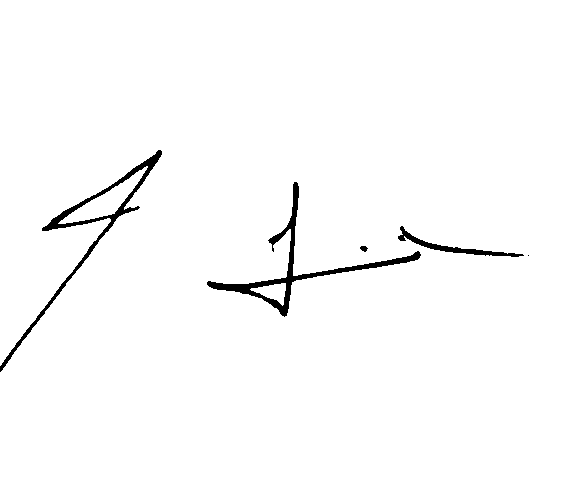

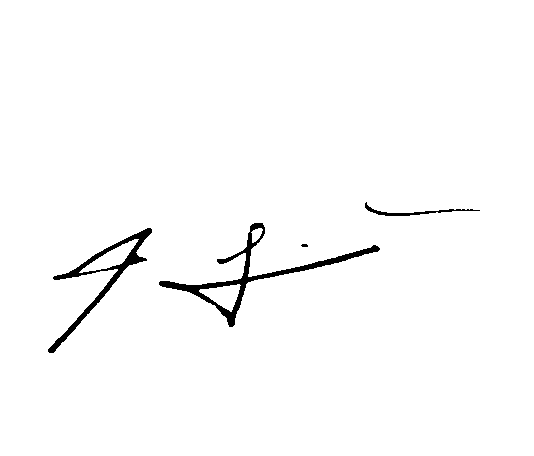

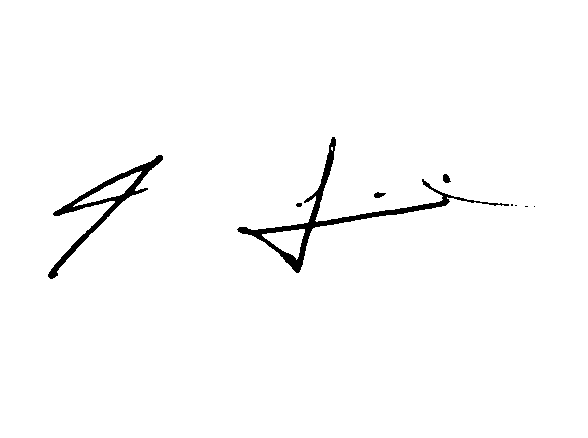

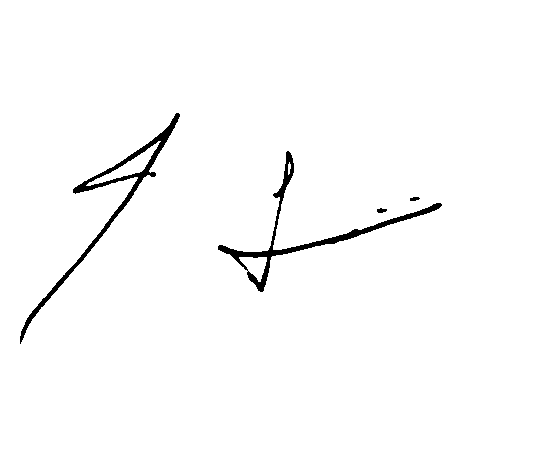

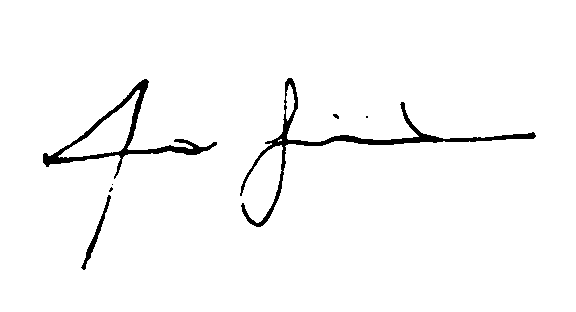

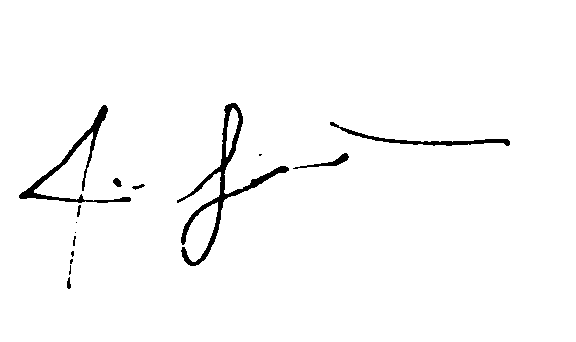

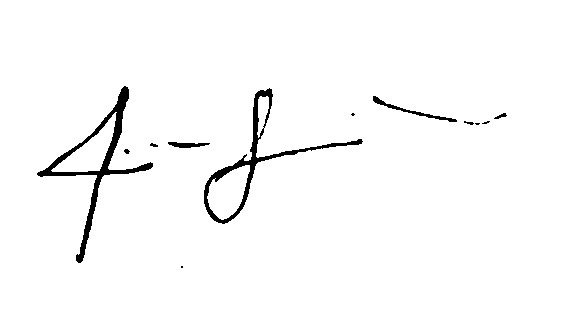

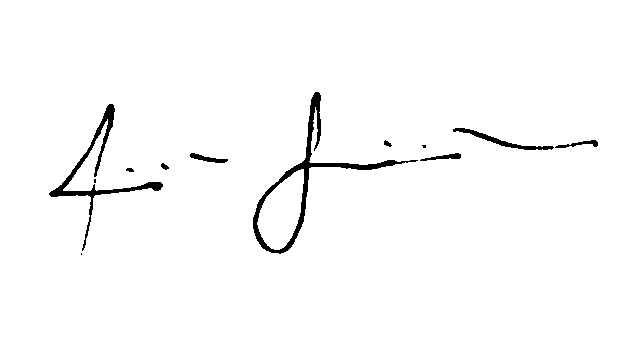

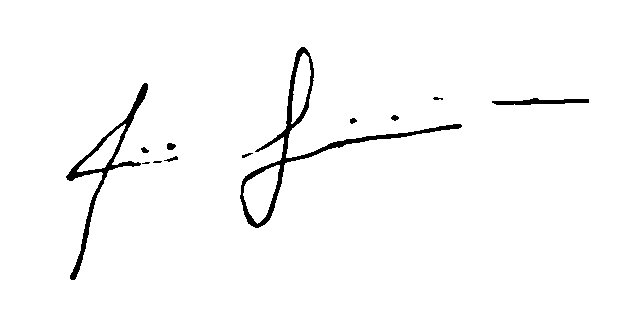

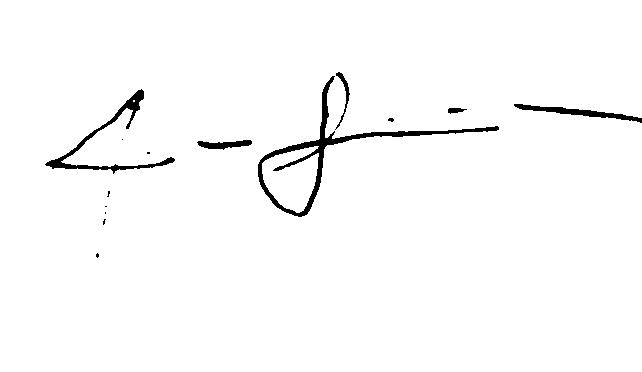

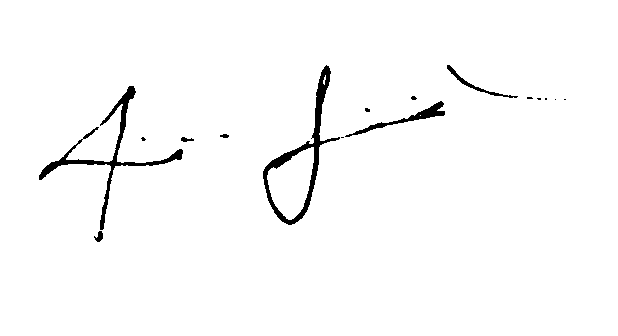

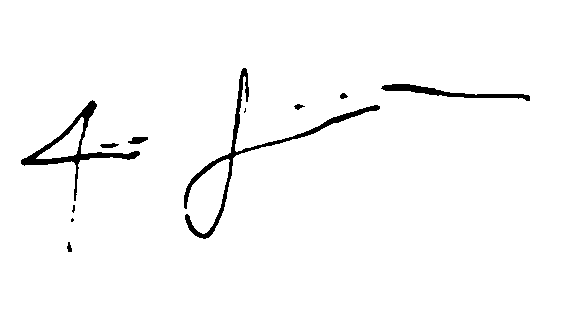

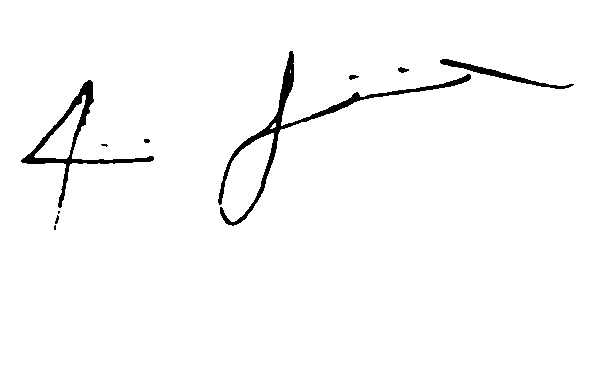

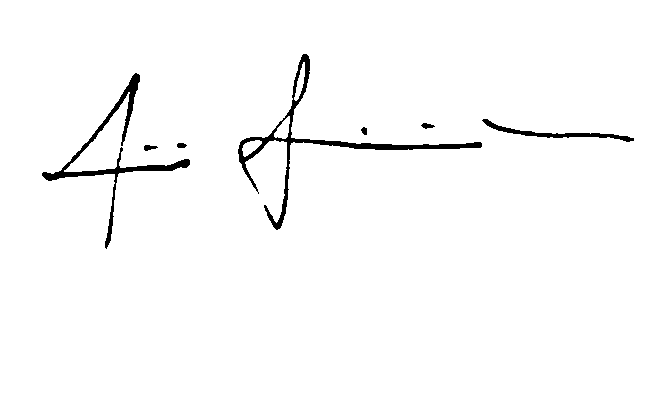

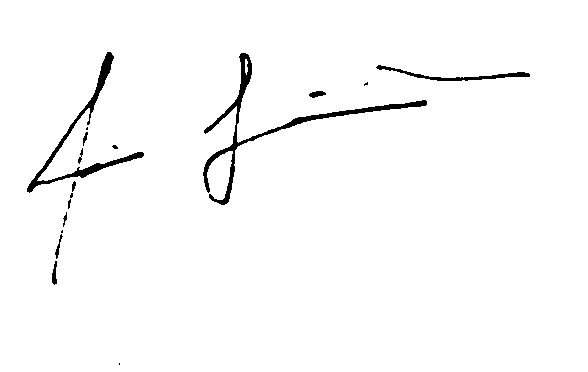

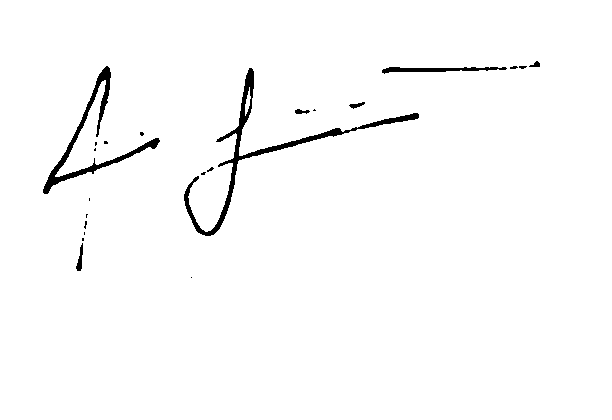

full_forg class loaded successfully
Loading class full_org
/content/drive/MyDrive/Colab projects/signature-forgery-detection/signatures/full_org
/content/drive/MyDrive/Colab projects/signature-forgery-detection/signatures/full_org/full_org1


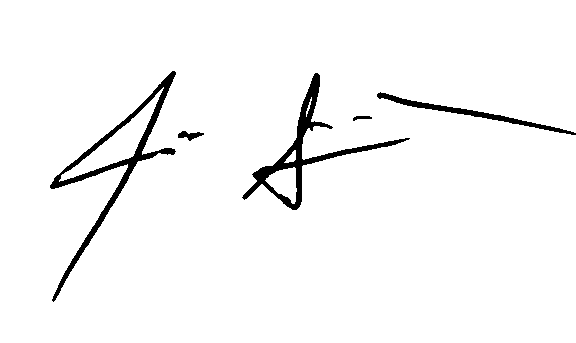

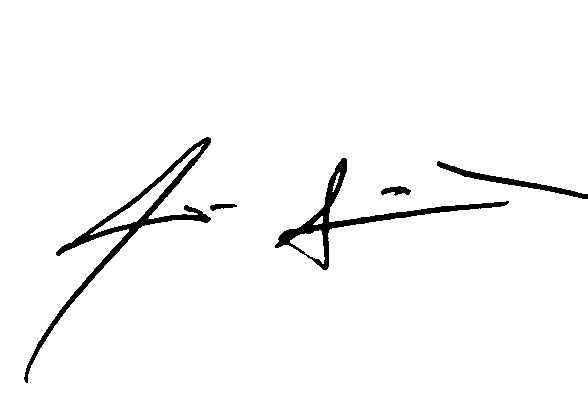

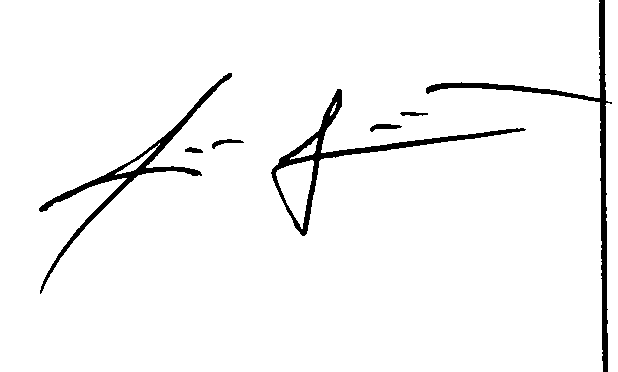

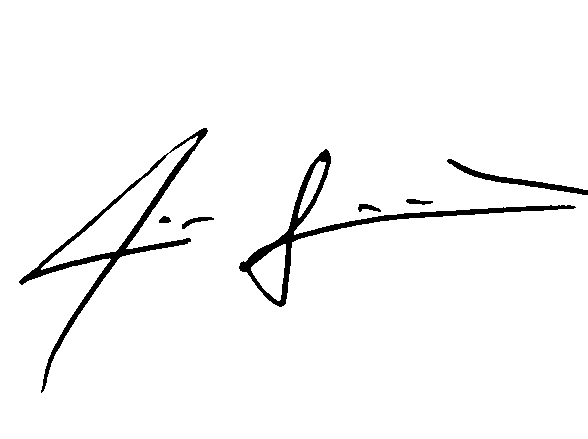

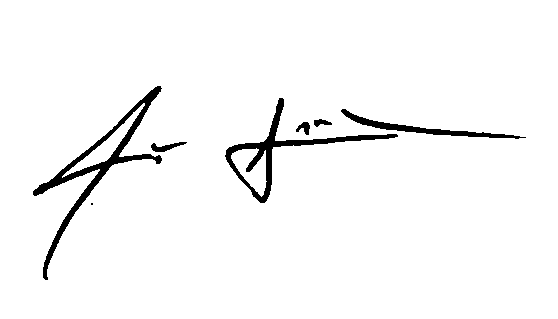

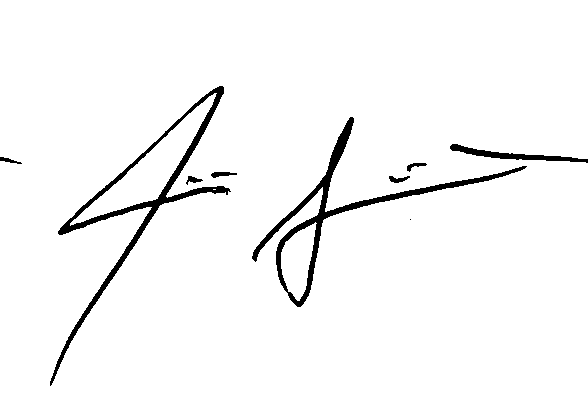

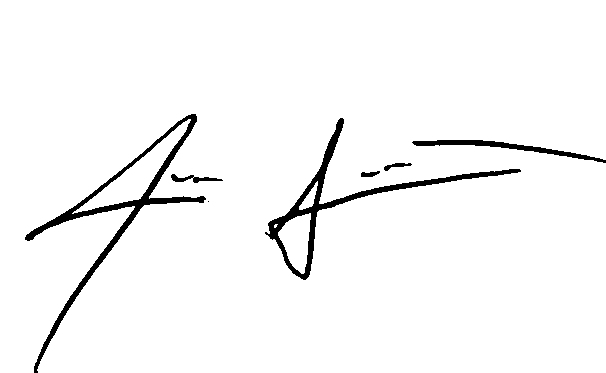

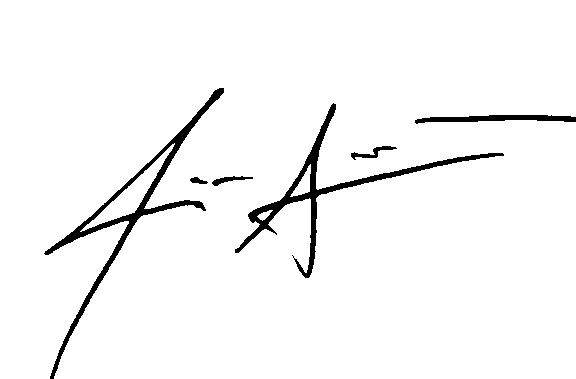

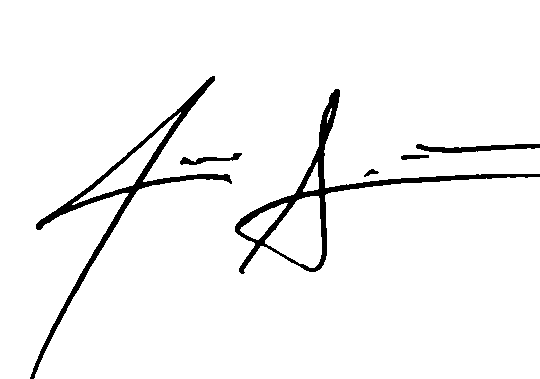

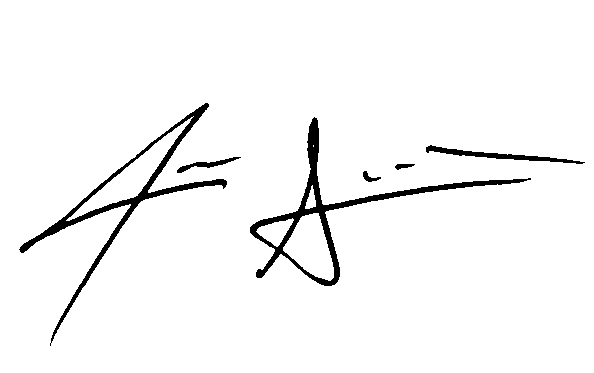

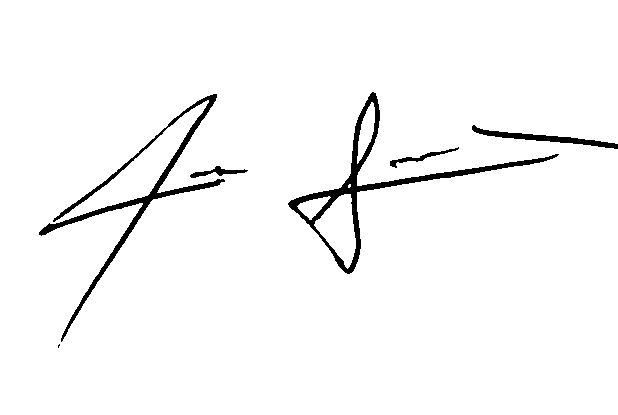

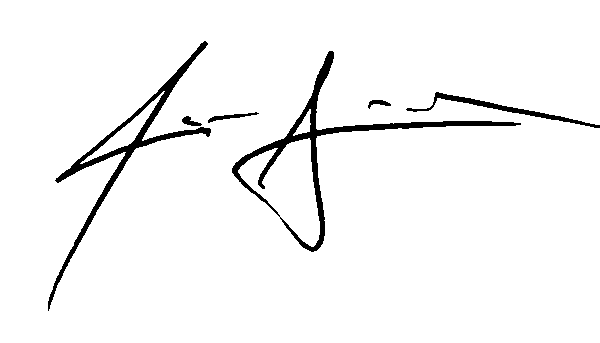

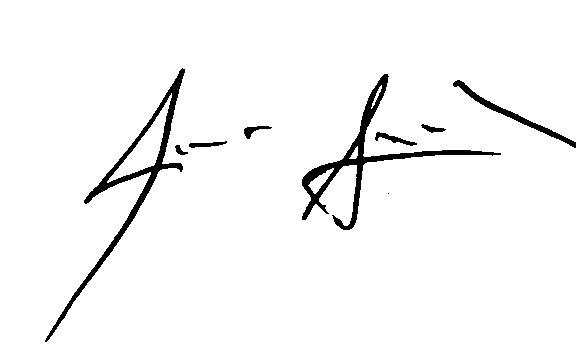

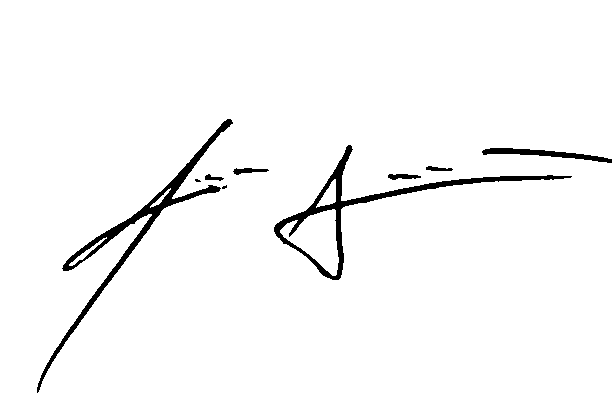

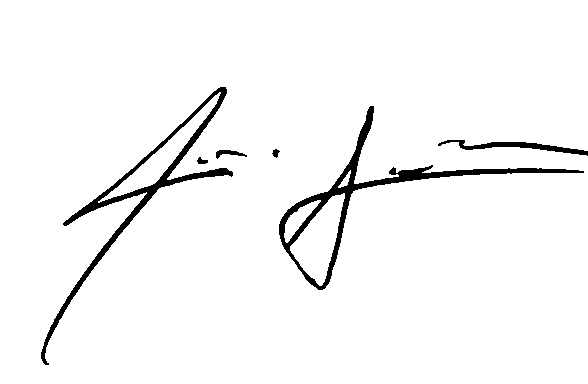

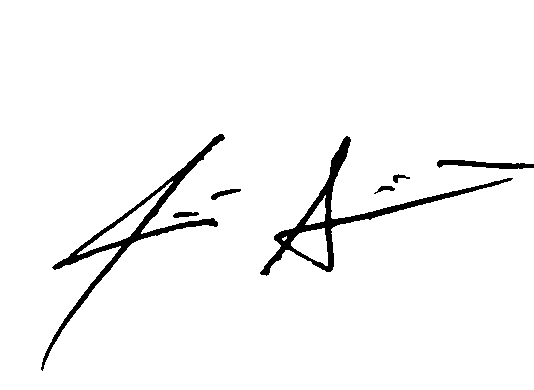

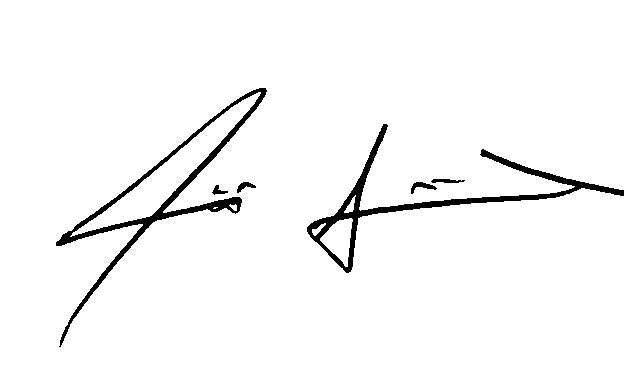

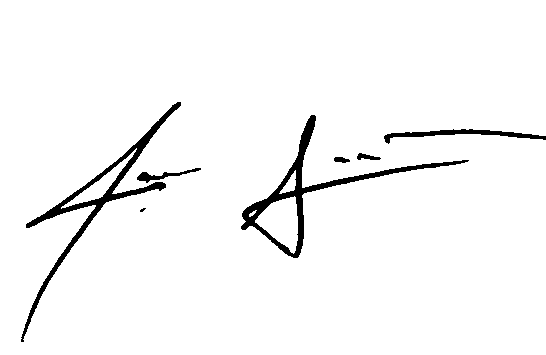

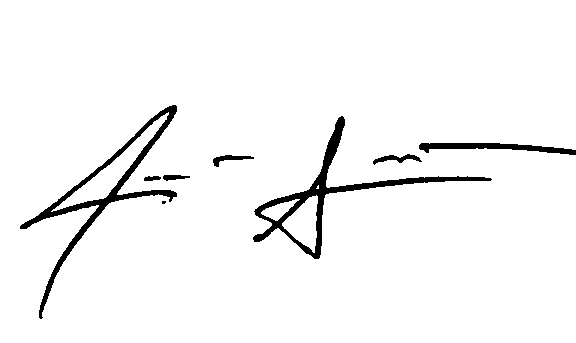

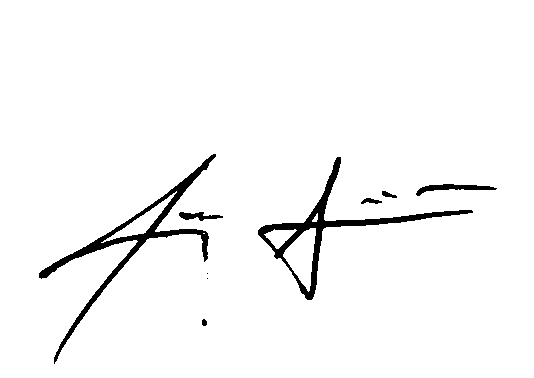

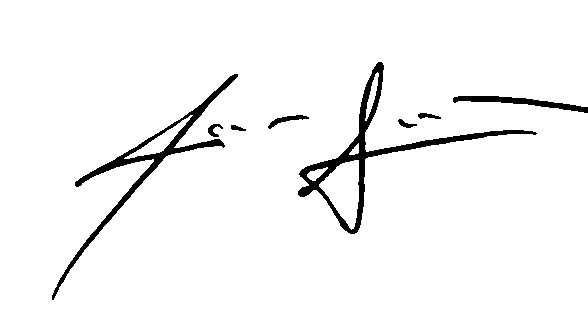

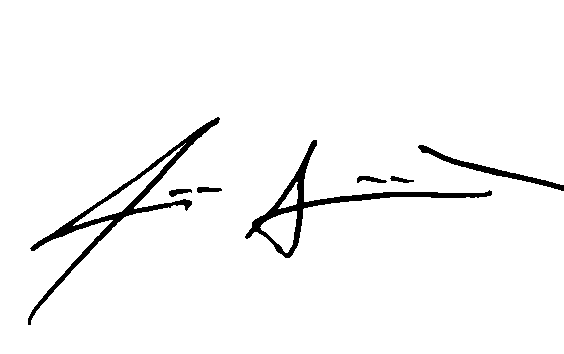

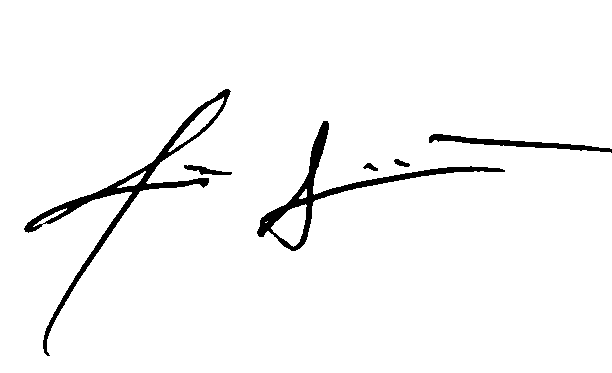

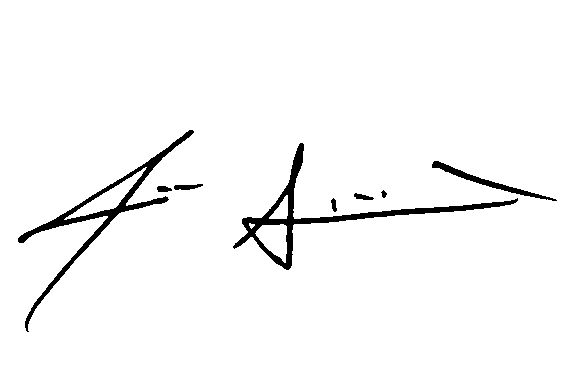

full_org class loaded successfully


In [ ]:
images_array = []
targets_array = []

for cls in classes:

  print(f"Loading class {cls}")
  curr_path = os.path.join(parent_path, cls)
  print(curr_path)

  img_path = os.path.join(curr_path, cls) + "1"
  print(img_path)

  for img in os.listdir(img_path):
    if(img.endswith(".png")):
      read_img = cv2.imread(os.path.join(img_path, img))
      pre_processed = pre_process(read_img)
      images_array.append(pre_processed)
      targets_array.append(classes.index(cls))

  print(f"{cls} class loaded successfully")

In [ ]:
descriptors = []
sift = cv2.SIFT_create()

max_len = 0

for img in images_array:
  _, desc = sift.detectAndCompute(img, None)
  np_desc = np.array(desc).flatten()
  # print(np_desc.shape)
  descriptors.append(np_desc)
  if len(np_desc) > max_len:
    max_len = len(np_desc)

descriptors = np.array(descriptors, dtype = object).flatten()
print(descriptors.shape)
targets_array = np.array(targets_array, dtype = int).flatten()
print(targets_array.shape)

(48,)
(48,)


In [ ]:
padded_descriptors = np.empty([descriptors.size, max_len], dtype = object)
print(padded_descriptors.shape)

for i, descriptor in enumerate(descriptors):
  padded = np.pad(descriptor, (0, max_len - len(descriptor))).flatten()
  padded_descriptors[i] = padded

print(padded_descriptors.shape)
print(str(padded_descriptors))


(48, 24064)
(48, 24064)
[[0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 9.0]
 ...
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]]


In [ ]:
X = padded_descriptors
y = targets_array
print(str(padded_descriptors))
print(str(targets_array))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 42)

print(len(X_train), len(y_train))

[[0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 9.0]
 ...
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1]
33 33


In [ ]:
svm = SVC(kernel = "linear", probability = True)

print(len(X_train), len(y_train))

svm.fit(X_train, y_train)

33 33


SVC(kernel='linear', probability=True)

In [ ]:
y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

1.0
